# 4. Model Monitoring

### Load model 

In [1]:
from joblib import load

In [2]:
class CreditChurnClassification():
    
    def __init__(self, model, features, acc):
        self.model = model
        self.features = features
        self.acc = acc

In [3]:
prediction_model = load('../Models/Churn_xgb_top.pkl')
prediction_model.model

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('ohe', OneHotEncoder(),
                                                  ['Gender']),
                                                 ('bin',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   strategy='uniform'),
                                                  ['Total_Revolving_Bal',
                                                   'Total_Trans_Amt']),
                                                 ('scaler', StandardScaler(),
                                                  ['Total_Trans_Ct',
                                                   'Total_Relationship_Count',
                                                   'Customer_Age',
                                                   'Total_Ct_Chng_Q4_Q1',
                                                   'Months_Inactive_12_mon',
                   

## 4.1 Drift Monitoring

## 4.2 Model Explanation

### 4.2.1 LIME

### 4.2.2 Shapley

## 4.3 Model Scorecard

In [4]:
!pip install --upgrade pip==20.3
!pip install -U seaborn scikit-learn model-card-toolkit

You should consider upgrading via the 'c:\users\robin\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\robin\anaconda3\python.exe -m pip install --upgrade pip' command.


In [5]:
from datetime import date
from io import BytesIO
from IPython import display
import model_card_toolkit as mctlib
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, ConfusionMatrixDisplay

import base64
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import uuid

In [6]:
churn_train = pd.read_pickle('../DataFiles/Churn_train.pkl')
churn_test = pd.read_pickle('../DataFiles/Churn_test.pkl')

In [7]:
X_train = churn_train.drop('Attrition_Flag',axis = 1)
y_train = churn_train['Attrition_Flag']

X_test = churn_test.drop('Attrition_Flag',axis = 1)
y_test = churn_test['Attrition_Flag']

### Plots to include  in scorecard

In [8]:
# Utility function that will export a plot to a base-64 encoded string that the model card will accept.

def plot_to_str():
    img = BytesIO()
    plt.savefig(img, format='png')
    return base64.encodebytes(img.getvalue()).decode('utf-8')

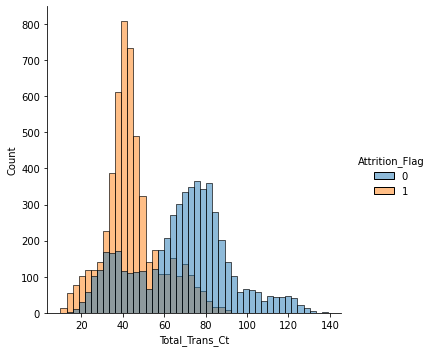

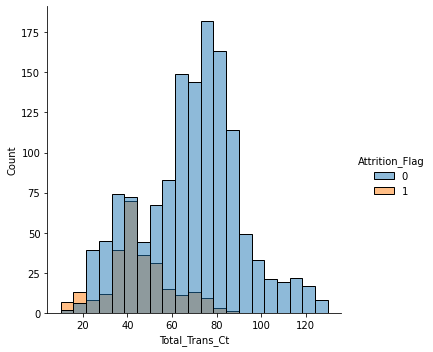

In [9]:
sns.displot(x = X_train['Total_Trans_Ct'], hue = y_train)
trans_cnt_train = plot_to_str()

sns.displot(x = X_test['Total_Trans_Ct'], hue = y_test)
trans_cnt_test = plot_to_str()

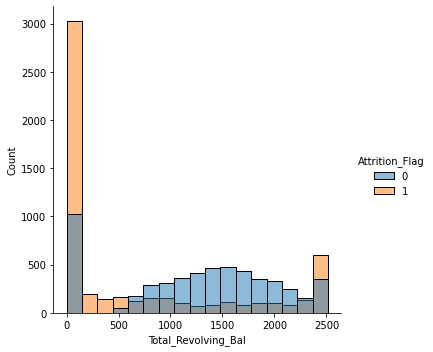

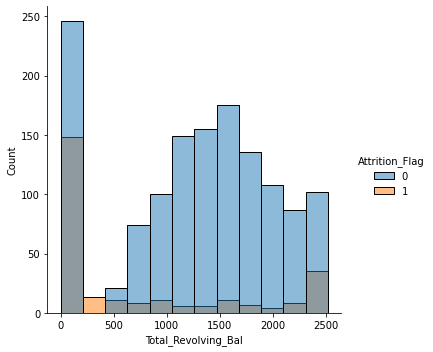

In [10]:
sns.displot(x = X_train['Total_Revolving_Bal'], hue = y_train)
rev_bal_train = plot_to_str()

sns.displot(x = X_test['Total_Revolving_Bal'], hue = y_test)
rev_bal_test = plot_to_str()

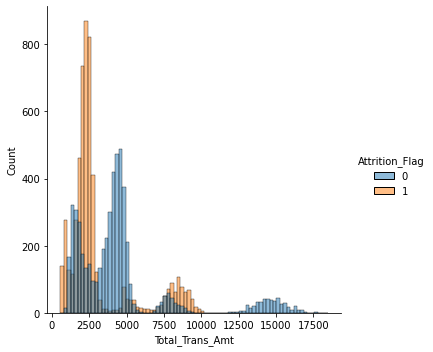

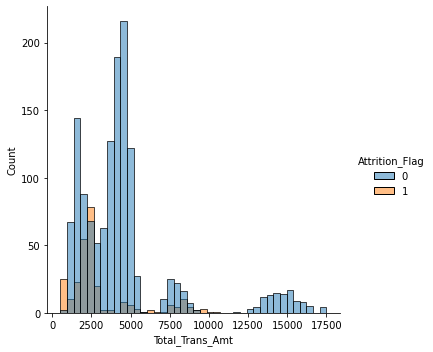

In [11]:
sns.displot(x = X_train['Total_Trans_Amt'], hue = y_train)
tran_amt_train = plot_to_str()

sns.displot(x = X_test['Total_Trans_Amt'], hue = y_test)
tran_amt_test = plot_to_str()

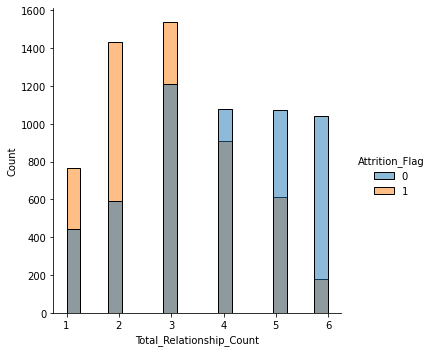

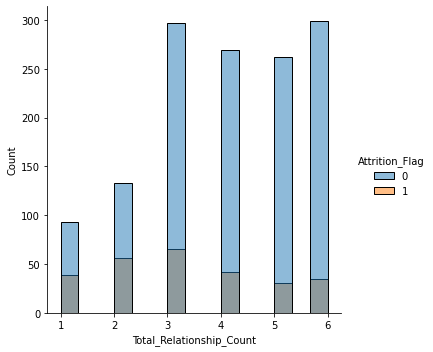

In [12]:
sns.displot(x = X_train['Total_Relationship_Count'], hue = y_train)
rel_cnt_train = plot_to_str()

sns.displot(x = X_test['Total_Relationship_Count'], hue = y_test)
rel_cnt_test = plot_to_str()

### Evaluation Metrics

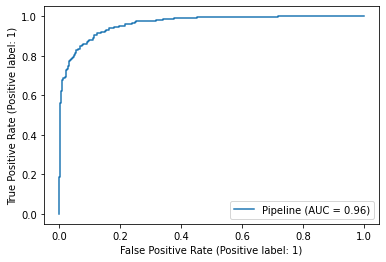

In [13]:
RocCurveDisplay.from_estimator(prediction_model.model,X_test,y_test)
roc_curve = plot_to_str()

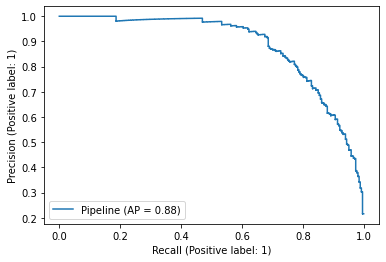

In [14]:
PrecisionRecallDisplay.from_estimator(prediction_model.model,X_test,y_test)
pr_curve = plot_to_str()

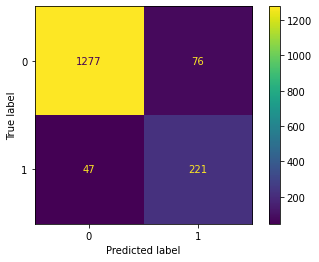

In [15]:
ConfusionMatrixDisplay.from_estimator(prediction_model.model, X_test,y_test)
cnf_matrix = plot_to_str

### Initalise Model Card

In [16]:
mct = mctlib.ModelCardToolkit()

model_card = mct.scaffold_assets()

### Model Details

In [17]:
model_card.model_details.name = 'Credi Card Churners Dataset'
model_card.model_details.overview = (
    'This model predicts whether a credit card customers is Exsiting or has Attrited based on trnsaction and other details')
model_card.model_details.owners = [
    mctlib.Owner(name= 'Group 3 MLOps', contact='robin.raj@iimb.ac.in')
]
model_card.model_details.version.name = str("Version 1.0")
model_card.model_details.version.date = str(date.today())

### Users, Ethics, and Limitation

In [18]:
model_card.considerations.ethical_considerations = [mctlib.Risk(
    name=('Leakage of Private Financial Data'),
    mitigation_strategy='Anonymize data'
)]
model_card.considerations.limitations = [mctlib.Limitation(description='Limited by avaiablity of personal data')]
model_card.considerations.use_cases = [mctlib.UseCase(description='Predict Credit Card Customer Churn')]
model_card.considerations.users = [mctlib.User(description='Banking Institutions'), mctlib.User(description='ML researchers')]

### Training and Test Dataset Distributions

In [19]:
model_card.model_parameters.data.append(mctlib.Dataset(name="Training Dataset"))
model_card.model_parameters.data[0].graphics.description = (
  f'{len(X_train)} rows with {len(X_train.columns)} features')
model_card.model_parameters.data[0].graphics.collection = [
    mctlib.Graphic(image=trans_cnt_train),
    mctlib.Graphic(image=rev_bal_train),
    mctlib.Graphic(image=tran_amt_train),
    mctlib.Graphic(image=rel_cnt_train)
]
model_card.model_parameters.data.append(mctlib.Dataset(name="Test Dataset"))
model_card.model_parameters.data[1].graphics.description = (
  f'{len(X_test)} rows with {len(X_test.columns)} features')
model_card.model_parameters.data[1].graphics.collection = [
    mctlib.Graphic(image=trans_cnt_test),
    mctlib.Graphic(image=rev_bal_test),
    mctlib.Graphic(image=tran_amt_test),
    mctlib.Graphic(image=rel_cnt_test)
]

### Model Evaluation Details

In [20]:
model_card.quantitative_analysis.graphics.description = (
  'ROC,PR Curve and Confusion Matrix')
model_card.quantitative_analysis.graphics.collection = [
    mctlib.Graphic(image=roc_curve),
    mctlib.Graphic(image=pr_curve),
    mctlib.Graphic(image=cnf_matrix)
]

In [21]:
mct.update_model_card(model_card)

TypeError: <function plot_to_str at 0x0000025ABFEA6DC8> has type function, but expected one of: bytes, unicode

### Generate Model Card

In [ ]:
html = mct.export_format(output_file='../Reports/ModelScoreCard.html')

### Preview

In [ ]:
display.display(display.HTML(html))